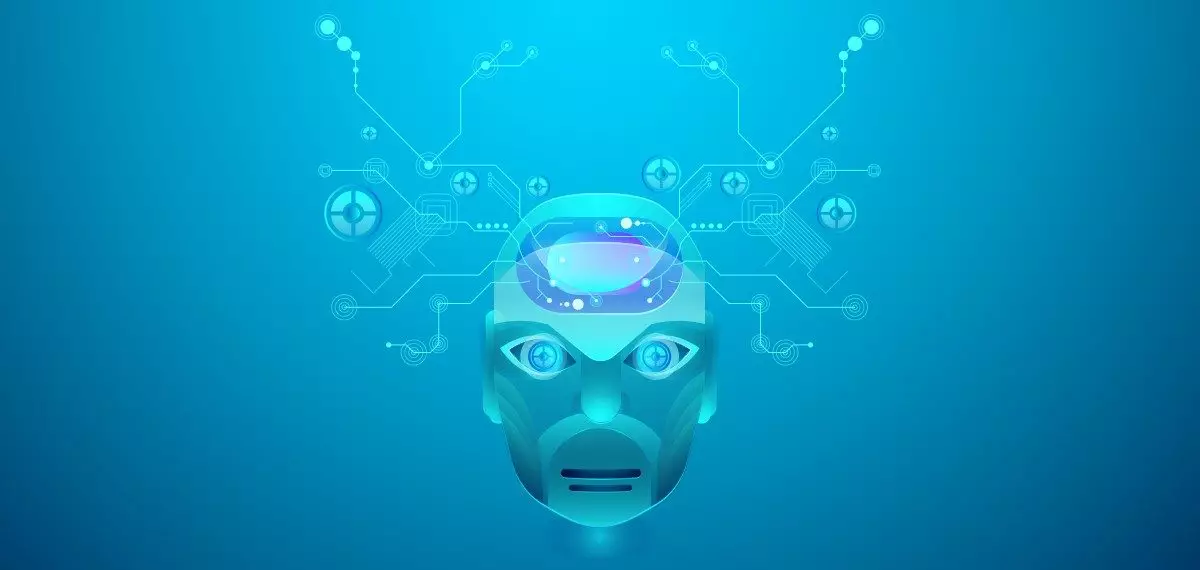.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
test_data = pd.read_csv("/kaggle/input/e-commerce-shoppers-behaviour-understanding/test_data_v2.csv")
train_data = pd.read_csv("/kaggle/input/e-commerce-shoppers-behaviour-understanding/train_data_v2.csv")
sample_data = pd.read_csv("/kaggle/input/e-commerce-shoppers-behaviour-understanding/sample.csv")

from sklearn.dummy import DummyClassifier
X = train_data["ProductDescriptionPage_Duration"]
X = X.to_numpy()
X = X.reshape(-1,1)
y = train_data["Made_Purchase"]
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X,y)


DummyClassifier(strategy='most_frequent')

In [3]:
DummyClassifier(strategy='most_frequent')
dummy_clf.predict(X)

sub = pd.DataFrame(dummy_clf.predict(test_data["ProductDescriptionPage_Duration"]), columns=['Made_Purchase'])
sub.index.name = 'id'
sub.to_csv("submission.csv", encoding='utf-8')

output = pd.read_csv("submission.csv")

* **I will do this project in five steps.**
*1. EDA (Explanatory Data Analysis)
*2. Data Cleaning and Preprocessing
*3. Will Select Appropiate Model.
*4. Hyper Prameter tunning and cross-validation.
*5. Prediction on base of model.

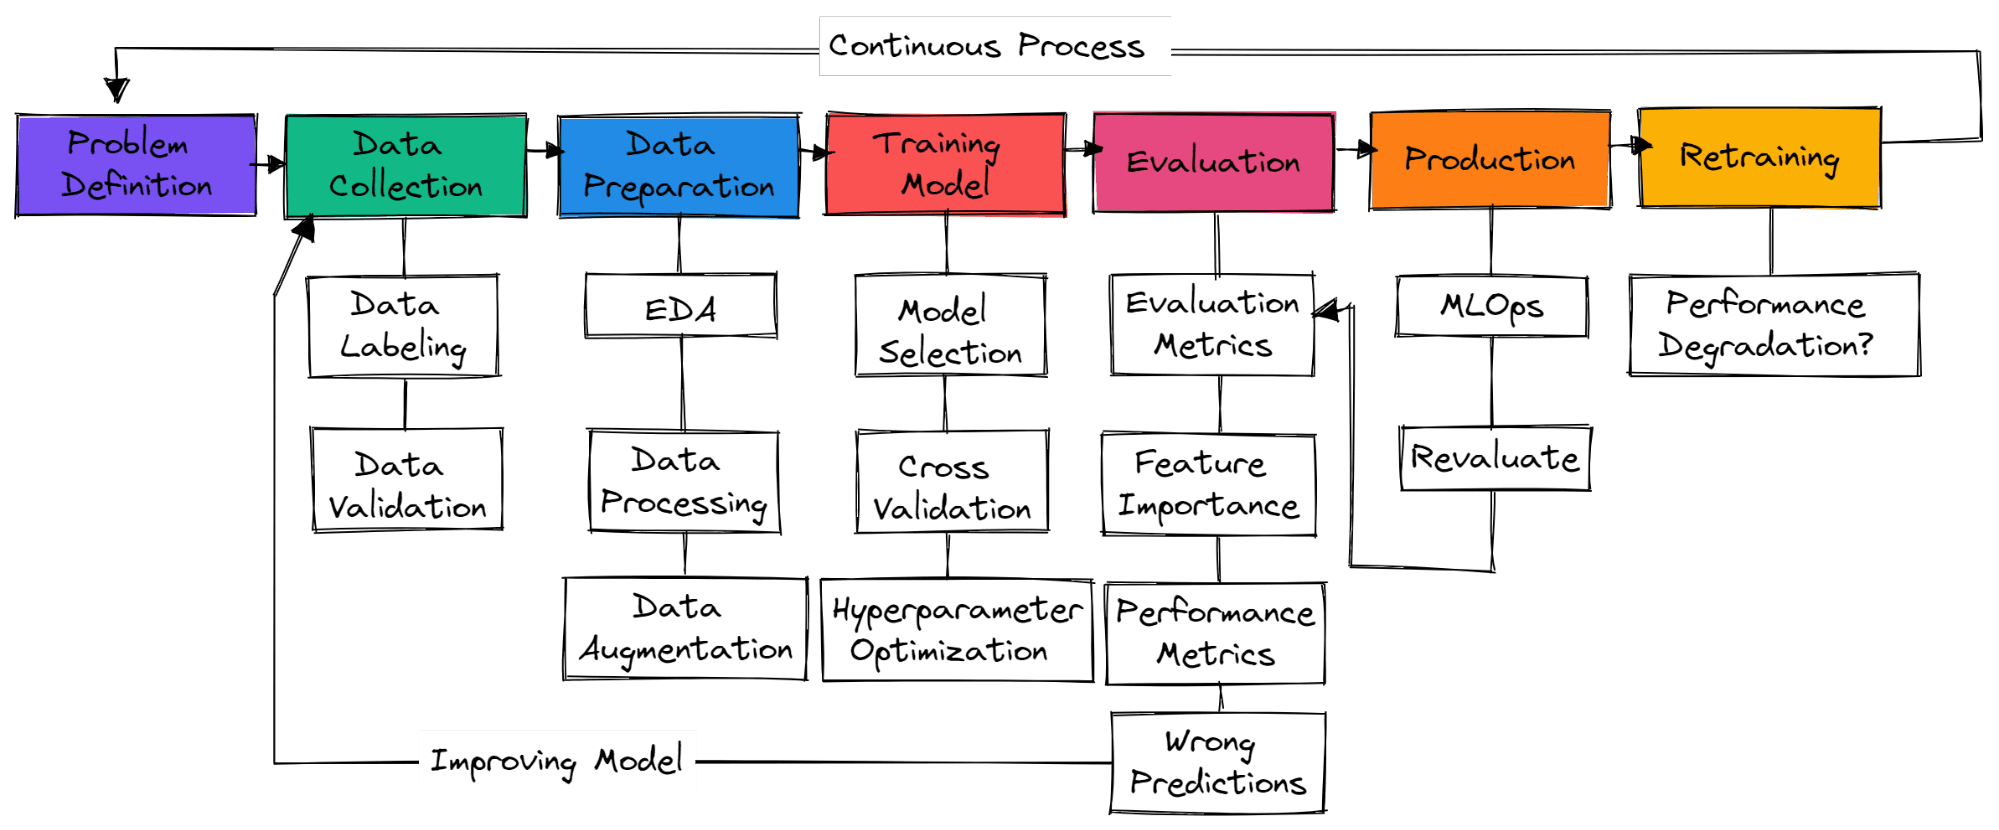.

**Step1**

In [4]:
train_data.head()

,HomePage,HomePage_Duration,LandingPage,LandingPage_Duration,ProductDescriptionPage,ProductDescriptionPage_Duration,GoogleMetric:Bounce Rates,GoogleMetric:Exit Rates,GoogleMetric:Page Values,SeasonalPurchase,...,SearchEngine,Zone,Type of Traffic,CustomerType,Gender,Cookies Setting,Education,Marital Status,WeekendPurchase,Made_Purchase
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,...,1.0,9.0,3.0,Returning_Visitor,Not Specified,Deny,Not Specified,Other,0.0,False
1,0.0,0.0,0.0,0.0,2.0,2.666667,0.05,0.14,0.0,0.0,...,2.0,2.0,4.0,Returning_Visitor,Female,Deny,Others,Married,0.0,False
2,0.0,0.0,0.0,0.0,10.0,627.500000,0.02,0.05,0.0,0.0,...,3.0,1.0,4.0,Returning_Visitor,Female,ALL,Others,Married,1.0,False
3,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.4,...,4.0,3.0,3.0,Returning_Visitor,Male,ALL,Diploma,Single,0.0,False
4,1.0,0.0,0.0,0.0,0.0,0.000000,0.20,0.20,0.0,0.0,...,2.0,1.0,5.0,Returning_Visitor,Male,Deny,Diploma,Other,1.0,False


In [5]:
train_data.describe()

,HomePage,HomePage_Duration,LandingPage,LandingPage_Duration,ProductDescriptionPage,ProductDescriptionPage_Duration,GoogleMetric:Bounce Rates,GoogleMetric:Exit Rates,GoogleMetric:Page Values,SeasonalPurchase,OS,SearchEngine,Zone,Type of Traffic,WeekendPurchase
count,14578.000000,14581.000000,14578.000000,14596.000000,14608.000000,14564.000000,14580.000000,14602.000000,14599.000000,14581.000000,14597.000000,14609.000000,14614.000000,14588.000000,14610.000000
mean,2.250240,79.300762,0.490739,33.455943,31.559488,1184.346084,0.023366,0.044664,4.812620,0.064083,2.122422,2.356629,3.155673,4.090143,0.234155
std,3.288042,179.374699,1.252376,140.146256,44.897089,2009.496307,0.050011,0.049912,16.887366,0.202583,0.914404,1.721823,2.405155,4.040147,0.423484
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,173.187500,0.000000,0.014502,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000,0.000000
50%,1.000000,5.000000,0.000000,0.000000,17.500000,584.333333,0.003478,0.026406,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000,0.000000
75%,3.000000,91.000000,0.000000,0.000000,38.000000,1434.255128,0.018182,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000,0.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000,1.000000


In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14731 entries, 0 to 14730
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   HomePage                         14578 non-null  float64
 1   HomePage_Duration                14581 non-null  float64
 2   LandingPage                      14578 non-null  float64
 3   LandingPage_Duration             14596 non-null  float64
 4   ProductDescriptionPage           14608 non-null  float64
 5   ProductDescriptionPage_Duration  14564 non-null  float64
 6   GoogleMetric:Bounce Rates        14580 non-null  float64
 7   GoogleMetric:Exit Rates          14602 non-null  float64
 8   GoogleMetric:Page Values         14599 non-null  float64
 9   SeasonalPurchase                 14581 non-null  float64
 10  Month_SeasonalPurchase           14587 non-null  object 
 11  OS                               14597 non-null  float64
 12  SearchEngine      

In [7]:
train_data.shape

(14731, 22)

In [8]:
train_data.isna().sum()

HomePage                           153
HomePage_Duration                  150
LandingPage                        153
LandingPage_Duration               135
ProductDescriptionPage             123
ProductDescriptionPage_Duration    167
GoogleMetric:Bounce Rates          151
GoogleMetric:Exit Rates            129
GoogleMetric:Page Values           132
SeasonalPurchase                   150
Month_SeasonalPurchase             144
OS                                 134
SearchEngine                       122
Zone                               117
Type of Traffic                    143
CustomerType                       144
Gender                             145
Cookies Setting                    144
Education                          136
Marital Status                     130
WeekendPurchase                    121
Made_Purchase                        0
dtype: int64

In [9]:
corr = train_data.corr()

<AxesSubplot:>

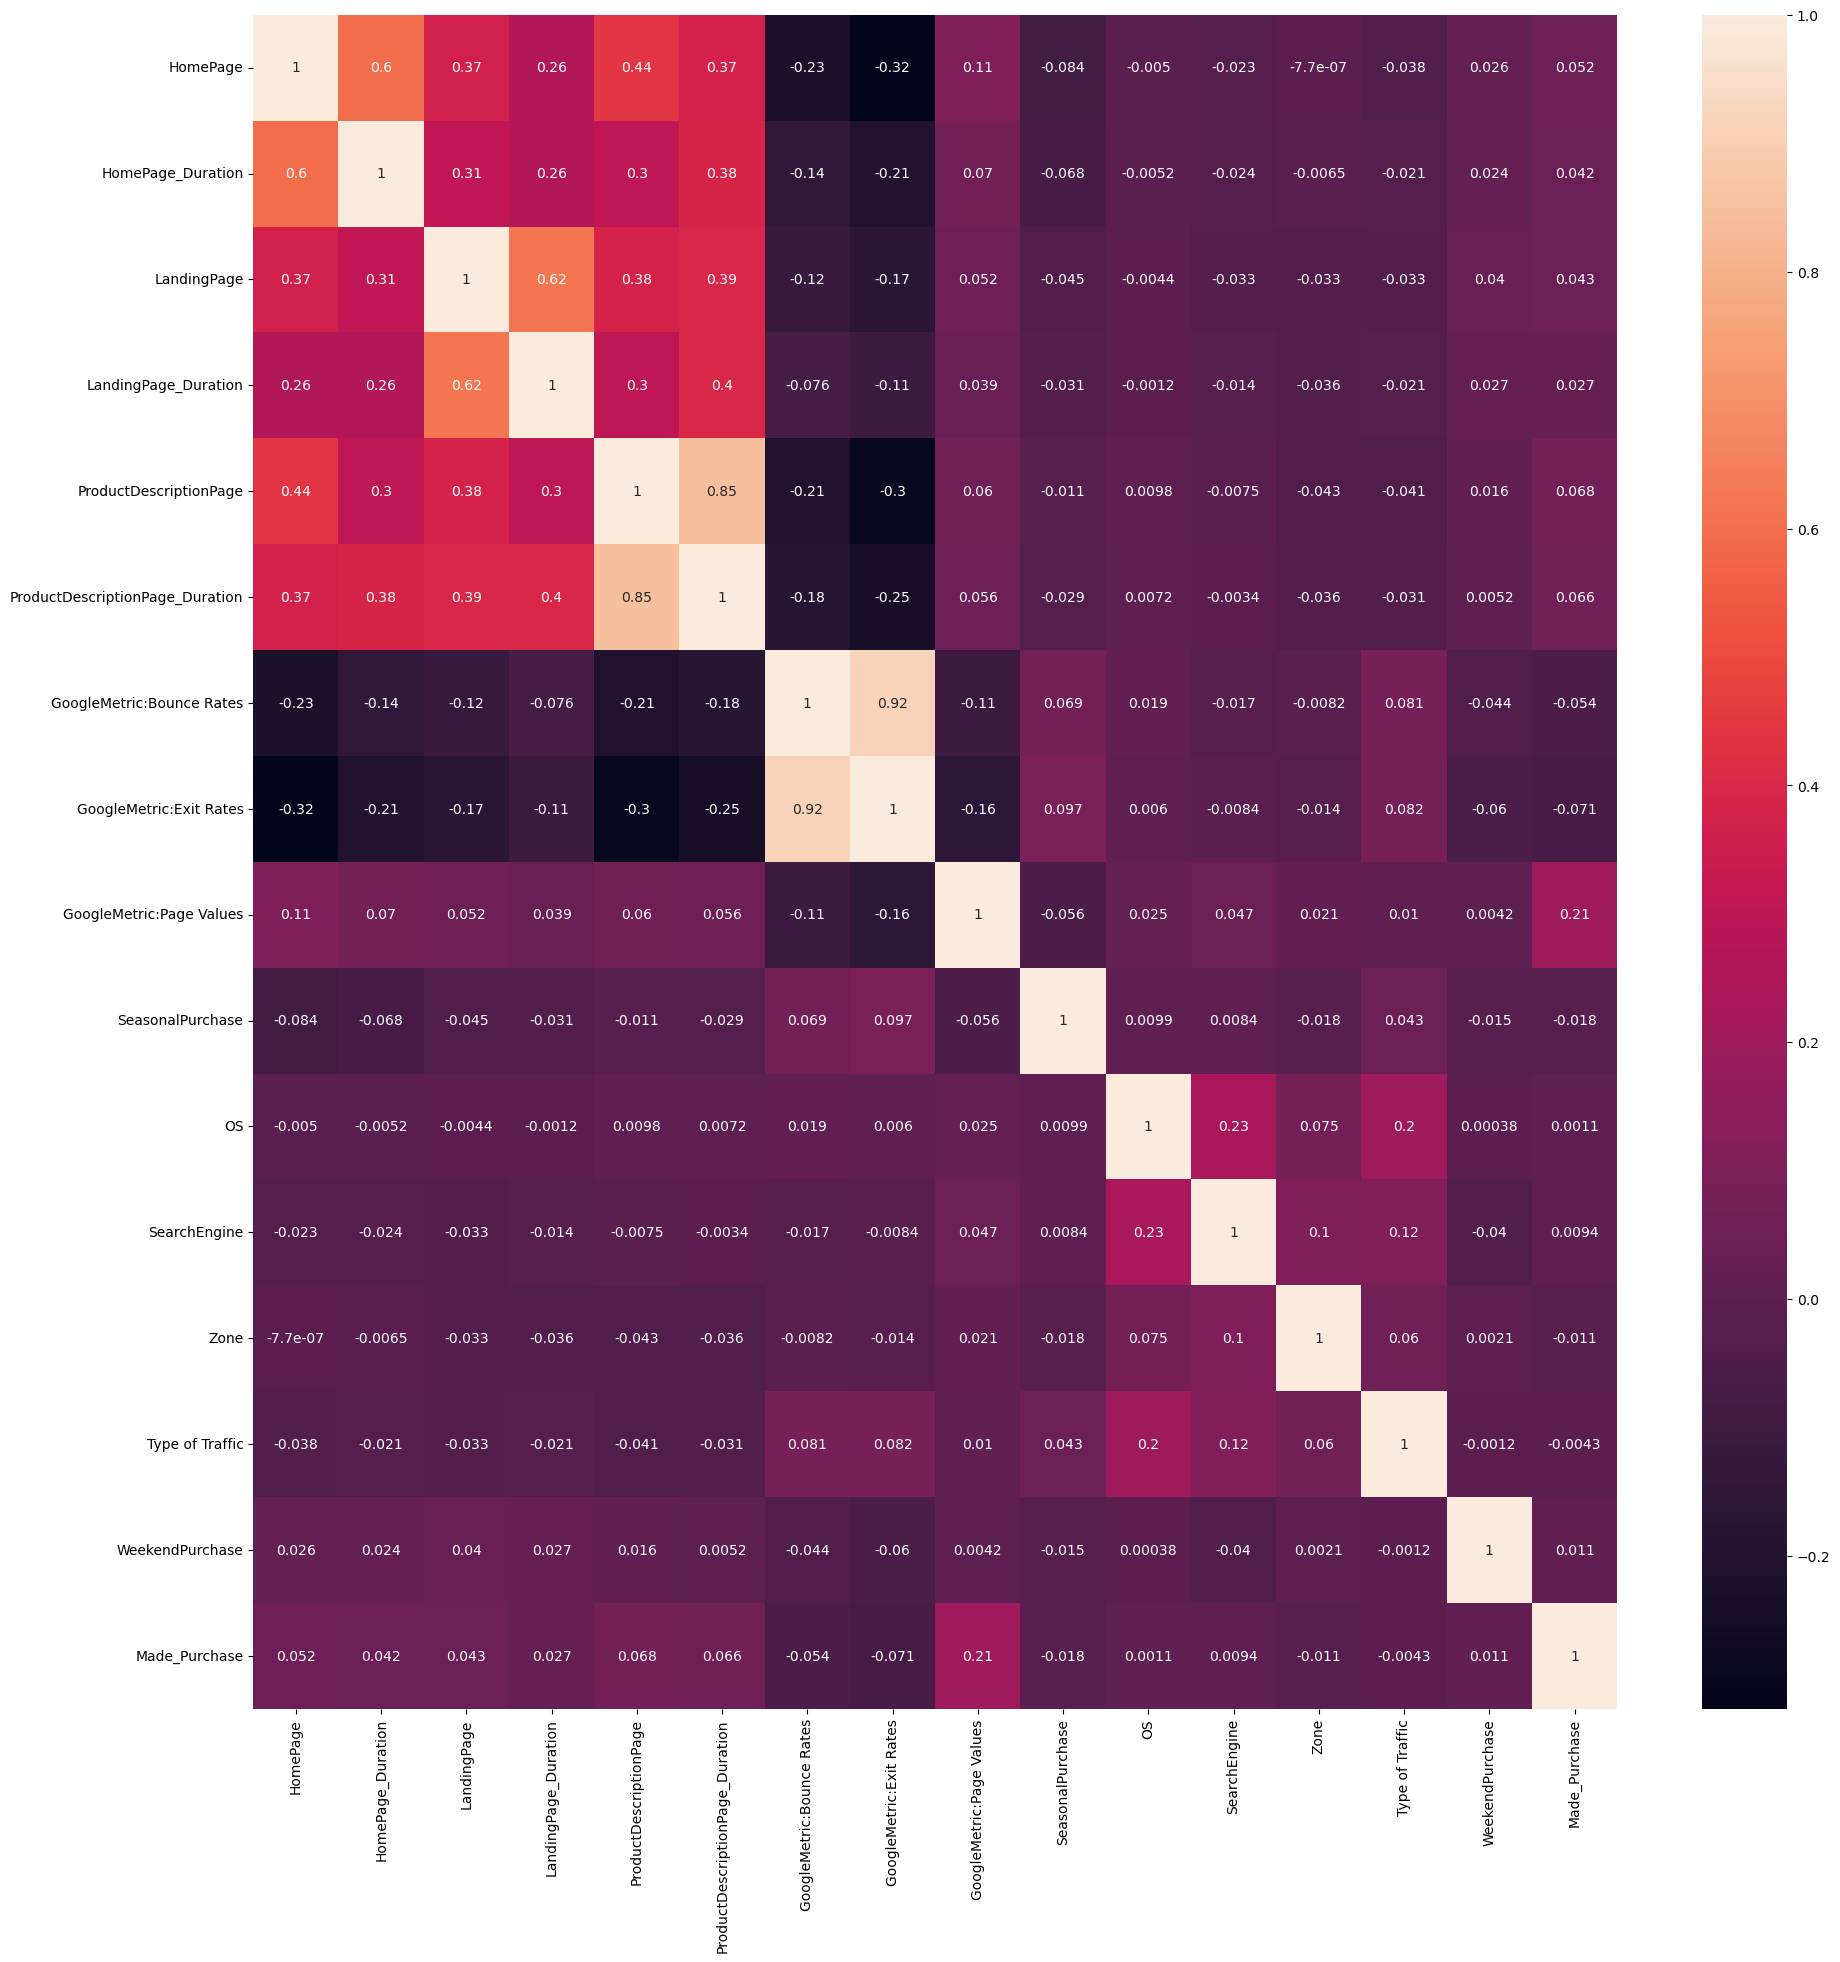

In [10]:
plt.figure(figsize=(22,22))
sns.heatmap(corr,annot=True)

In [11]:
train_data['CustomerType'].unique()

array(['Returning_Visitor', 'New_Visitor', 'Other', nan], dtype=object)

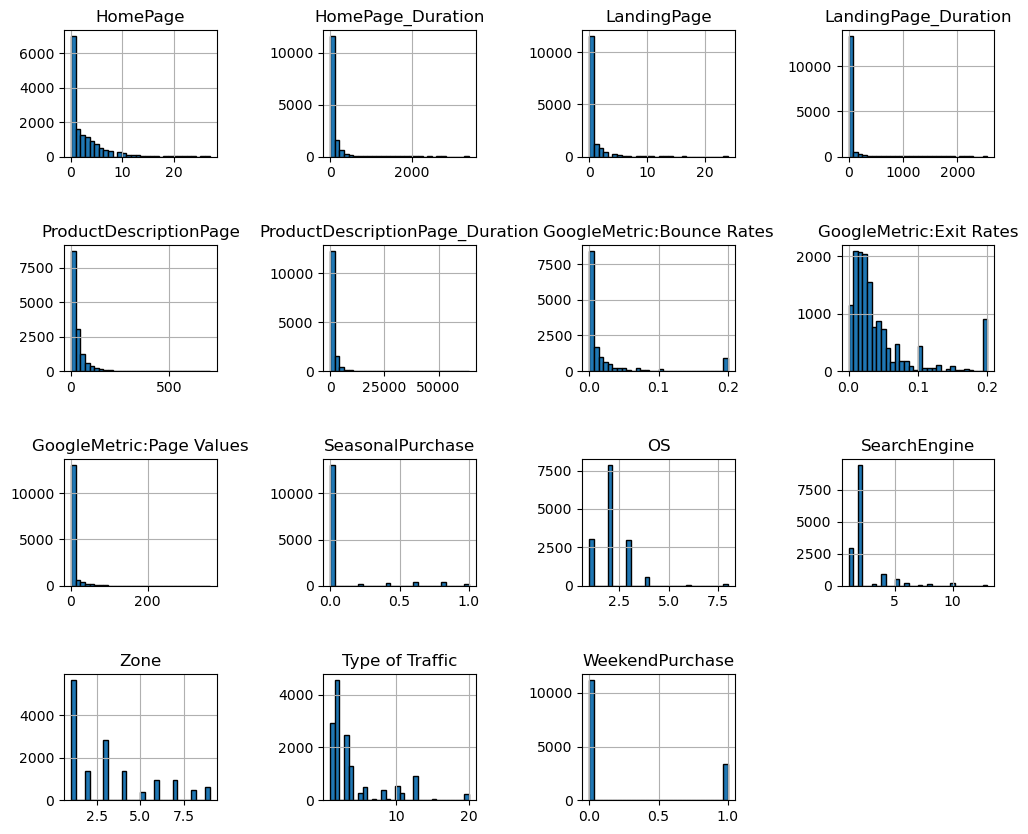

In [12]:
train_data.hist(figsize=(12,10),bins=30,edgecolor='black')
plt.subplots_adjust(hspace=0.7,wspace=0.7)

* **Observations from EDA**
1. HomePage is highly overall correlated with HomePage_Duration so i will select HomePage_Duration as a feature in feature matrix
2. LandingPage is highly overall correlated with LandingPage_Duration so i will select LandingPage_Duration as a feature in feature matrix
3. ProductDescriptionPage is highly overall correlated with ProductDescriptionPage_Duration so i will select ProductDescriptionPage as a feature in feature matrix
4. I will also select PageValue feature
5. I will impute most frequent value for imputation in CustomerType feature and select as a feature.



* **Now we will impute and Scale the Data**
1. I will impute HomePage_Duration,LandingPage_duration,ProductDescriptionPage and GoogleMetric:Page Values with mean strategy
2. I will impute CustomerType with most frequent stategy


In [13]:
#importing the the Data Cleaning tools
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

***Catagorical and Numerical Features***

In [14]:
train_data.head()

,HomePage,HomePage_Duration,LandingPage,LandingPage_Duration,ProductDescriptionPage,ProductDescriptionPage_Duration,GoogleMetric:Bounce Rates,GoogleMetric:Exit Rates,GoogleMetric:Page Values,SeasonalPurchase,...,SearchEngine,Zone,Type of Traffic,CustomerType,Gender,Cookies Setting,Education,Marital Status,WeekendPurchase,Made_Purchase
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,...,1.0,9.0,3.0,Returning_Visitor,Not Specified,Deny,Not Specified,Other,0.0,False
1,0.0,0.0,0.0,0.0,2.0,2.666667,0.05,0.14,0.0,0.0,...,2.0,2.0,4.0,Returning_Visitor,Female,Deny,Others,Married,0.0,False
2,0.0,0.0,0.0,0.0,10.0,627.500000,0.02,0.05,0.0,0.0,...,3.0,1.0,4.0,Returning_Visitor,Female,ALL,Others,Married,1.0,False
3,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.4,...,4.0,3.0,3.0,Returning_Visitor,Male,ALL,Diploma,Single,0.0,False
4,1.0,0.0,0.0,0.0,0.0,0.000000,0.20,0.20,0.0,0.0,...,2.0,1.0,5.0,Returning_Visitor,Male,Deny,Diploma,Other,1.0,False


In [15]:
test_data.head()

,HomePage,HomePage_Duration,LandingPage,LandingPage_Duration,ProductDescriptionPage,ProductDescriptionPage_Duration,GoogleMetric:Bounce Rates,GoogleMetric:Exit Rates,GoogleMetric:Page Values,SeasonalPurchase,...,OS,SearchEngine,Zone,Type of Traffic,CustomerType,Gender,Cookies Setting,Education,Marital Status,WeekendPurchase
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.200000,0.200000,0.0,0.0,...,1.0,1.0,1.0,1.0,Returning_Visitor,Not Specified,Deny,Not Specified,Single,0.0
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.000000,0.100000,0.0,0.0,...,2.0,2.0,1.0,2.0,Returning_Visitor,Not Specified,ALL,Graduate,Married,0.0
2,0.0,0.0,0.0,0.0,19.0,154.216667,0.015789,0.024561,0.0,0.0,...,2.0,2.0,1.0,3.0,Returning_Visitor,Female,Required,Diploma,Other,0.0
3,0.0,0.0,0.0,0.0,2.0,37.000000,0.000000,0.100000,0.0,0.8,...,2.0,2.0,2.0,3.0,Returning_Visitor,Not Specified,Required,Graduate,Other,0.0
4,0.0,0.0,0.0,0.0,16.0,407.750000,0.018750,0.025833,0.0,0.4,...,1.0,1.0,4.0,3.0,Returning_Visitor,Female,Deny,Others,Other,0.0


In [16]:
num_features = ['HomePage','HomePage_Duration','LandingPage','LandingPage_Duration','ProductDescriptionPage','ProductDescriptionPage_Duration',
                'GoogleMetric:Bounce Rates','GoogleMetric:Exit Rates','GoogleMetric:Page Values','SeasonalPurchase','OS','SearchEngine','Zone',
                'Type of Traffic','WeekendPurchase']
cat_features = ['Month_SeasonalPurchase','CustomerType','Gender','Cookies Setting','Education','Marital Status']

**Impute**

In [17]:
Impute = ColumnTransformer([('sim1',SimpleImputer(strategy='median'),num_features),
                            ('sim2',SimpleImputer(strategy='most_frequent'),cat_features)])
X = Impute.fit_transform(train_data.iloc[:,:-1])
X_t = Impute.fit_transform(test_data)
X = pd.DataFrame(data=X)
X_t = pd.DataFrame(data=X_t)

**Scale**

In [18]:
num = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14]
cat = [15,16,17,18,19,20]

Scale = ColumnTransformer([('sca',RobustScaler(),num),
                           ('one',OneHotEncoder(),cat)])

X = Scale.fit_transform(X)
X_t = Scale.fit_transform(X_t)

X = pd.DataFrame(data=X)
X_t = pd.DataFrame(data=X_t)
X.head()

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,40
0,-0.333333,-0.055556,0.0,0.0,-0.550000,-0.470341,11.136232,4.913025,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,-0.333333,-0.055556,0.0,0.0,-0.516667,-0.468194,2.636232,3.214912,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
2,-0.333333,-0.055556,0.0,0.0,-0.250000,0.034746,0.936232,0.667742,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
3,-0.333333,-0.055556,0.0,0.0,-0.550000,-0.470341,11.136232,4.913025,0.0,0.4,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.000000,-0.055556,0.0,0.0,-0.583333,-0.470341,11.136232,4.913025,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [19]:
X_t.head()

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,40
0,-0.333333,-0.054167,0.0,0.0,-0.533333,-0.460928,11.317986,4.911554,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,-0.333333,-0.054167,0.0,0.0,-0.500000,-0.409205,-0.182014,2.081365,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,-0.333333,-0.054167,0.0,0.0,0.066667,-0.336296,0.725880,-0.053690,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,-0.333333,-0.054167,0.0,0.0,-0.500000,-0.431026,-0.182014,2.081365,0.0,0.8,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,-0.333333,-0.054167,0.0,0.0,-0.033333,-0.131400,0.896111,-0.017692,0.0,0.4,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [20]:
y = train_data.iloc[:,-1]

**Importing the model**


In [21]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV

**HyperParameter Tunning**

**Over Sampling**

In [22]:
'''from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)'''

'from imblearn.over_sampling import SMOTE\nsm = SMOTE(random_state=42)\nX_res, y_res = sm.fit_resample(X, y)'

**Model Fitting and Prediction**

In [23]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
model = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3,min_samples_leaf=20,criterion='gini'),learning_rate=0.01,n_estimators=150)


In [24]:
model.fit(X,y)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3,
                                                         min_samples_leaf=20),
                   learning_rate=0.01, n_estimators=150)

In [25]:
y_pred = model.predict(X_t)

In [26]:
y_pred

array([False, False, False, ..., False, False, False])

**Prediction to CSV**

In [27]:
sub = pd.DataFrame(y_pred, columns=['Made_Purchase'])
sub.index.name = 'id'
sub.to_csv("submission.csv", encoding='utf-8')

output = pd.read_csv("submission.csv")